In [37]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Load the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,1.0,0.72


In [39]:
# Drop a column
df.drop('Serial No.', axis=1, inplace=True)
df.head(3)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3,3.0,3.5,8.00,1.0,0.72


In [40]:
# Convert the 'Chance of Admit ' column to 0 or 1 and rename it to 'Admitted'
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.75 else 0)
df['Admitted'].sample(6)


161    0
189    1
196    0
456    0
494    0
23     1
Name: Admitted, dtype: int64

In [41]:
# split the dataset into features (X) and target (y)
X = df.drop('Admitted', axis=1)
y = df['Admitted']

In [42]:
# Split the dataset into training and testing sets
X = df.drop('Admitted', axis=1)
y = df['Admitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
X_train.shape , X_test.shape

((400, 8), (100, 8))

In [44]:
# Create a pipeline that imputes missing values, scales the data, and train a DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # impute missing values with the mean
    ('scaler', StandardScaler()),  # scale the data
    ('clf', DecisionTreeClassifier())  # train a DecisionTreeClassifier
])

In [45]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [46]:
# Make predictions
y_pred = pipeline.predict(X_test)


In [47]:
# Evaluate the pipeline
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)



Accuracy: 100.0


In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [49]:
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))

confusion_matrix:
[[64  0]
 [ 0 36]]


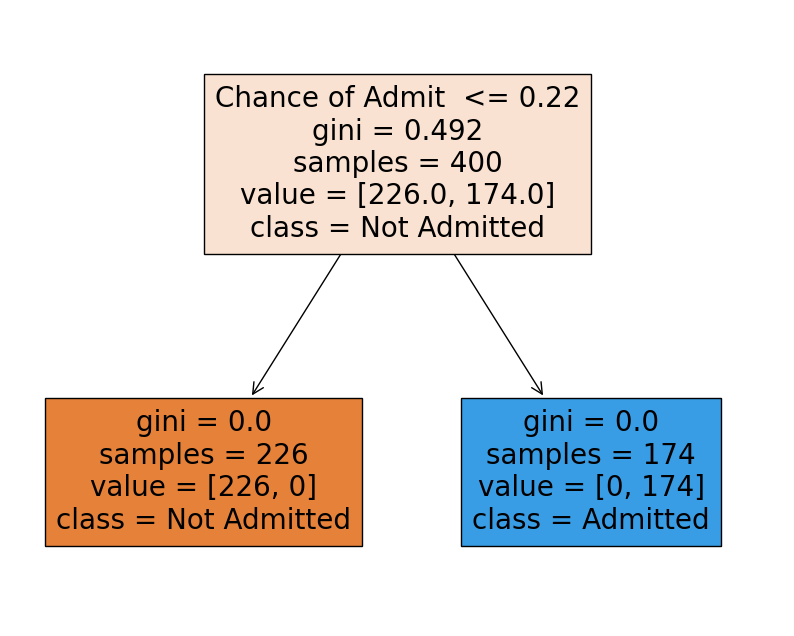

In [51]:
# Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(pipeline['clf'], filled=True, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'])
plt.show()

